# Neural Networks
Important things to remember

- Neural networks are not magic, just math
- There are no recipes for building neural networks, only "best practices"
- Neural networks can learn (almost) anything, given enough data

# Imports and helper functions

In [0]:
import numpy as np
import types
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'RdBu'

import sklearn.datasets as datasets
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline


def plot_decision_boundary(model, X, y, degree=1):
    """
    Use this to plot the decision boundary of a trained model.
    """
    grid_lim = np.array([[X[:,0].min(), X[:,0].max()], [X[:,1].min(), X[:,1].max()]])
    xx, yy = np.mgrid[grid_lim[0,0]:grid_lim[0,1]:.01, 
                      grid_lim[1,0]:grid_lim[1,1]:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    t = PolynomialFeatures(degree=degree, include_bias=False)
    _poly = t.fit_transform(grid)
    
    probs = model.predict_proba(_poly)[:, 1].reshape(xx.shape)
    
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                        vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[:,0], X[:, 1], c=y, s=100,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(grid_lim[0,0],grid_lim[0,1]), 
           ylim=(grid_lim[1,0],grid_lim[1,1]),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.gcf().set_size_inches(21, 14)
    return f, ax
  
  

def plot_history(h):
  
  fig, (ax1, ax2) = plt.subplots(1, 2)
  
  ax1.plot(h.history['loss'], label='Training Loss')
  ax1.plot(h.history['val_loss'], label='Test Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(fontsize=24)
  ax1.set_ylim(0, 1)
  
  ax2.plot(h.history['acc'], label='Training Accuracy')
  ax2.plot(h.history['val_acc'], label='Test Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(fontsize=24)
  ax2.set_ylim(0, 1)
  
  fig.suptitle('Evolution over epochs', fontsize=24)
  
  fig.set_size_inches(21, 14)


# Regression

First things first, let's import **keras**.

In [3]:
import keras

Using TensorFlow backend.


For this part, we're going to use Boston Housing Dataset

In [4]:
from urllib.request import urlopen
file = urlopen('https://raw.githubusercontent.com/bucharestschoolofai/bsoai_2.0/master/2.3/train.csv')
data = pd.read_csv(file, delimiter=',', usecols=['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'Fireplaces'])

X = data.loc[:, :'GarageCars'].values
y = data.loc[:, 'SalePrice':].values

data.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FullBath,Fireplaces,GarageCars,SalePrice
0,8450,7,5,2003,856,2,0,2,208500
1,9600,6,8,1976,1262,2,1,2,181500
2,11250,7,5,2001,920,2,1,2,223500
3,9550,7,5,1915,756,1,1,3,140000
4,14260,8,5,2000,1145,2,1,3,250000


Creating the model:

In [5]:
model = keras.models.Sequential()

# First layer needs the input shape to be specified. We're dealing with 8D points, so input_shape=(8,)
model.add(keras.layers.Dense(units=4, input_shape=(8,), activation='tanh', name='layer_1'))

# ReLU for the activation function
model.add(keras.layers.Dense(units=4, activation='sigmoid',  name='layer_2'))

# The final layer has 1 neuron because we predict one value, the price
model.add(keras.layers.Dense(units=1, activation='relu',  name='layer_3'))

# Loss is Mean Squared Error and we're using the Adam optimizer. 
model.compile(loss='mean_squared_error', optimizer='adam')

Let's see how Keras sees our models

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
layer_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
layer_3 (Dense)              (None, 1)                 5         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


Now, let's start training!

In [7]:
history = model.fit(X,y,batch_size=1,epochs=10,validation_split=0.2)




Train on 1168 samples, validate on 292 samples
Epoch 1/10





1168/1168 [==============================] - 2s 2ms/step - loss: 38819444052.3836 - val_loss: 39918562001.5342
Epoch 2/10
1168/1168 [==============================] - 1s 1ms/step - loss: 38819444052.3836 - val_loss: 39918562001.5342
Epoch 3/10
1168/1168 [==============================] - 1s 1ms/step - loss: 38819444052.3836 - val_loss: 39918562001.5342
Epoch 4/10
1168/1168 [==============================] - 1s 1ms/step - loss: 38819444052.3836 - val_loss: 39918562001.5342
Epoch 5/10
1168/1168 [==============================] - 1s 1ms/step - loss: 38819444052.3836 - val_loss: 39918562001.5342
Epoch 6/10
1168/1168 [==============================] - 1s 1ms/step - loss: 38819444052.3836 - val_loss: 39918562001.5342
Epoch 7/10
1168/1168 [==============================] - 1s 1ms/step - loss: 38819444052.3836 - val_loss: 39918562001.5342
Epoch 8/10
1168/1168 [==============================] - 1s 1ms/step - loss: 38819444052.383

## Coding Challenge
Try to make this model better:
- Add more layers
- Add more neurons on layers
- Change activation functions

In [0]:
# Start here

# Classification
We're going to use the moons dataset which is generated with Keras.

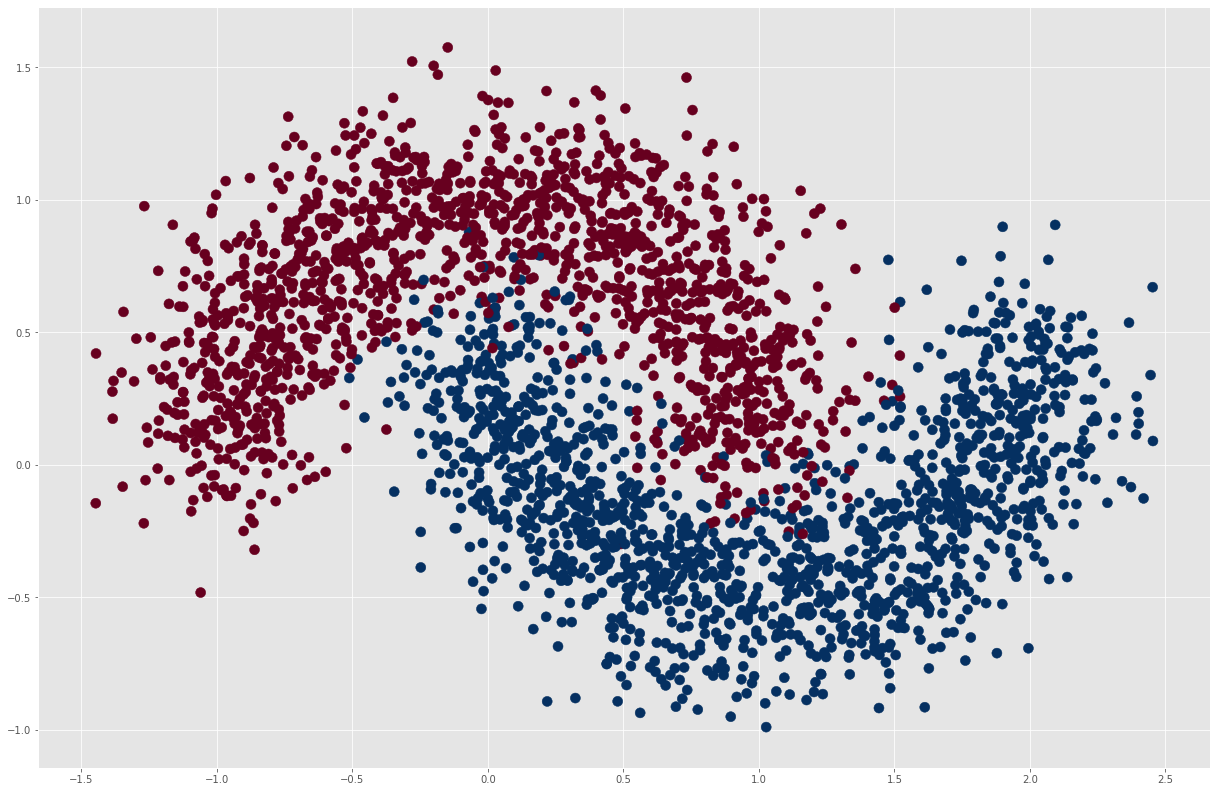

In [9]:
X, y = datasets.make_moons(3000, noise=0.2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.gcf().set_size_inches(21, 14)

Let's build a simple 3-layer neural network that can classify these points

In [10]:
model = keras.models.Sequential()


# First layer needs the input shape to be specified. We're dealing with 2D points, so input_shape=(2,)
model.add(keras.layers.Dense(units=4, input_shape=(2,), activation='relu', name='layer_1'))

# ReLU for the activation function
model.add(keras.layers.Dense(units=4, activation='relu',  name='layer_2'))

# Softmax activation to output probabilities 
model.add(keras.layers.Dense(units=2, activation='softmax',  name='layer_3'))

# Loss is crossentropy, like in LogisticRegression! Optimizer is Stochastic Gradient Descent and we are interested in accuracy.
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
layer_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
layer_3 (Dense)              (None, 2)                 10        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


We can see how Keras defines it's models but let's get a deeper perspective

In [11]:
for layer in model.layers:
  weights, bias = layer.get_weights()
  print(f'Loss:{layer.name}, Neurons: {layer.input_shape[1]}')
  print(f'Weights:\n{weights}')
  print(f'Bias:\n{bias}\n')

Loss:layer_1, Neurons: 2
Weights:
[[-0.5719342  -0.474658    0.7798908  -0.01675773]
 [-0.5568929  -0.96132016  0.8090923   0.40058374]]
Bias:
[0. 0. 0. 0.]

Loss:layer_2, Neurons: 4
Weights:
[[ 0.3624596  -0.37134683  0.65874034  0.1518901 ]
 [-0.6843688  -0.15751082 -0.11298209 -0.44176173]
 [-0.4253326   0.23032147  0.5593291   0.19455296]
 [-0.5088786  -0.20132887 -0.04812449 -0.19228625]]
Bias:
[0. 0. 0. 0.]

Loss:layer_3, Neurons: 4
Weights:
[[-0.61914515 -0.9369111 ]
 [-0.24731469 -0.44967484]
 [-0.01091909 -0.03736472]
 [-0.3830645   0.81832385]]
Bias:
[0. 0.]



We can see that each layer has enough weights to fully connect to the neurons of the next layer.

Let's get to training and see how it performs.

In [12]:
model.fit(X,y,batch_size=1,epochs=10,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.4757 - acc: 0.7854 - val_loss: 0.2923 - val_acc: 0.8767
Epoch 2/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.3044 - acc: 0.8638 - val_loss: 0.2485 - val_acc: 0.8817
Epoch 3/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2866 - acc: 0.8679 - val_loss: 0.2412 - val_acc: 0.9083
Epoch 4/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2813 - acc: 0.8675 - val_loss: 0.2500 - val_acc: 0.8967
Epoch 5/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2790 - acc: 0.8746 - val_loss: 0.2781 - val_acc: 0.8767
Epoch 6/10
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2784 - acc: 0.8717 - val_loss: 0.2292 - val_acc: 0.8933
Epoch 7/10
2400/2400 [==============================] -

(<Figure size 1512x1008 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff25a83abe0>)

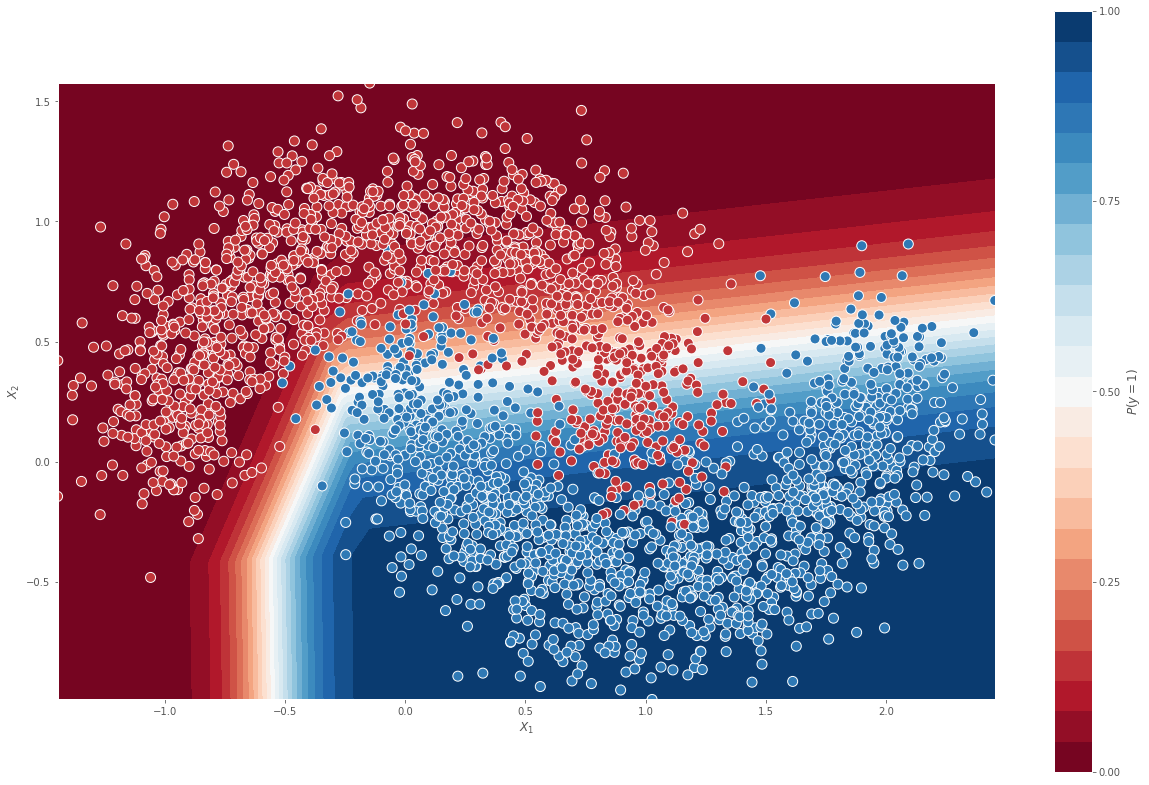

In [13]:
plot_decision_boundary(model, X, y)

## Coding Challenge
Try to make this model better:
- Add more layers
- Add more neurons on layers
- Change activation functions

In [0]:
# Start here

# Initializers
We saw that the matrix weights were some random numbers. In Keras, we can specify the initialization function in the arguments. Let's initialize the weights with zeros and see what happens.

In [15]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units=4, input_shape=(2,), activation='relu', kernel_initializer='zeros', bias_initializer='zeros'))

model.add(keras.layers.Dense(units=4, activation='relu'))

model.add(keras.layers.Dense(units=2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(X, y, batch_size=1, epochs=5, validation_split=0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.6949 - acc: 0.4967 - val_loss: 0.6934 - val_acc: 0.5033
Epoch 2/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.6952 - acc: 0.4817 - val_loss: 0.6932 - val_acc: 0.5033
Epoch 3/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.6942 - acc: 0.4862 - val_loss: 0.6937 - val_acc: 0.4967
Epoch 4/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.6947 - acc: 0.4950 - val_loss: 0.6954 - val_acc: 0.4967
Epoch 5/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.6943 - acc: 0.5079 - val_loss: 0.6932 - val_acc: 0.5033


# Learning Rate
The learning rate hyperparameter can be very important, as a too low learning rate can make the model get stuck in a local minima, and a higher learning rate can make the model overshoot. 

A good rule of thumb is to start with a higher learning rate initially, and then decrease it as the learning progresses.

In [16]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))

model.add(keras.layers.Dense(units=4, activation='relu'))

model.add(keras.layers.Dense(units=2, activation='softmax'))

# Play with the learning rate hyperparameter
sgd = keras.optimizers.SGD(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X, y, batch_size=1, epochs=5, validation_split=0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.3466 - acc: 0.8496 - val_loss: 0.3228 - val_acc: 0.8683
Epoch 2/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2905 - acc: 0.8671 - val_loss: 0.2502 - val_acc: 0.8883
Epoch 3/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2410 - acc: 0.8950 - val_loss: 0.4183 - val_acc: 0.7883
Epoch 4/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1798 - acc: 0.9275 - val_loss: 0.1278 - val_acc: 0.9600
Epoch 5/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1245 - acc: 0.9475 - val_loss: 0.1019 - val_acc: 0.9683


# Computer Vision 
Let's teach a neural network to **READ** some digits. We will be using the classic [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).


In [17]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


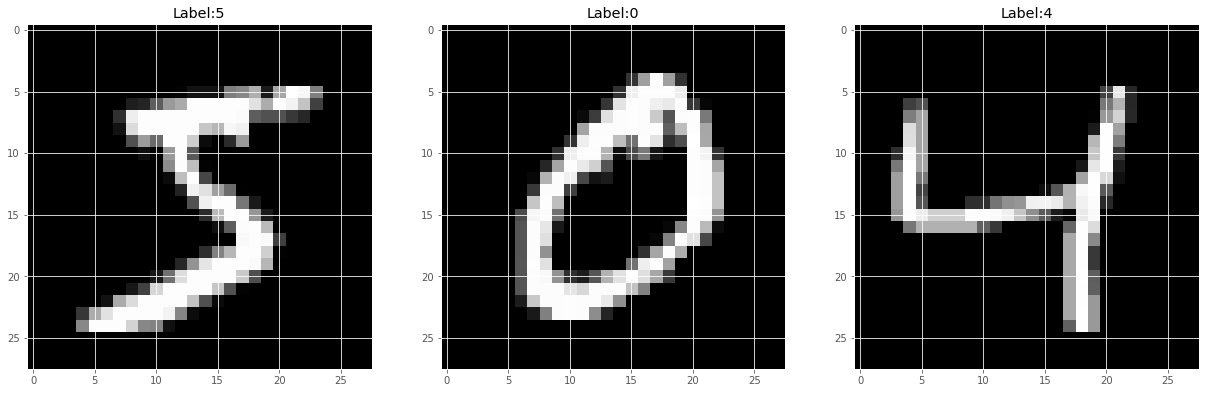

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(x_train[0], cmap='gray')
ax1.set_title('Label:' + str(y_train[0]))


ax2.imshow(x_train[1], cmap='gray')
ax2.set_title('Label:' + str(y_train[1]))

ax3.imshow(x_train[2], cmap='gray')
ax3.set_title('Label:' + str(y_train[2]))

fig.set_size_inches(21, 14)

To process these images with some fully connected neural network, we need to "flatten" them, because these types of layers can handle only vectors as input.

In [19]:
model = keras.models.Sequential()


model.add(keras.layers.Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


Flattening inherently neglects valuable spatial information, therefore using fully-connected layers with flattening is not the best approach for analysing images.

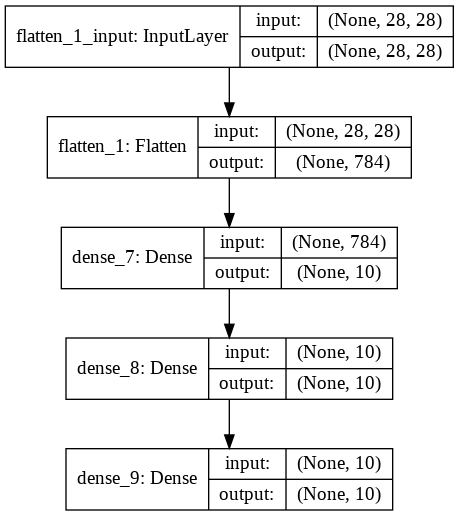

In [20]:
keras.utils.plot_model(model, show_layer_names=True, show_shapes=True, to_file='model.png')

from IPython.display import Image

Image(filename='model.png', height=600)

Let's train!

In [21]:
history = model.fit(x_train / 255., y_train, # our data
              epochs=10, # number of passes
              batch_size=32, # number of images per training step
              validation_data=(x_test / 255., y_test)) # validation data

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.5790 - acc: 0.8289 - val_loss: 0.3425 - val_acc: 0.9042
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3210 - acc: 0.9099 - val_loss: 0.2912 - val_acc: 0.9164
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2794 - acc: 0.9223 - val_loss: 0.2556 - val_acc: 0.9283
Epoch 4/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2512 - acc: 0.9306 - val_loss: 0.2415 - val_acc: 0.9318
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2361 - acc: 0.9349 - val_loss: 0.2369 - val_acc: 0.9333
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2243 - acc: 0.9381 - val_loss: 0.2261 - val_acc: 0.9360
Epoch 7/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2166 - acc: 0.9391 - val_loss: 0.2192 - val_acc

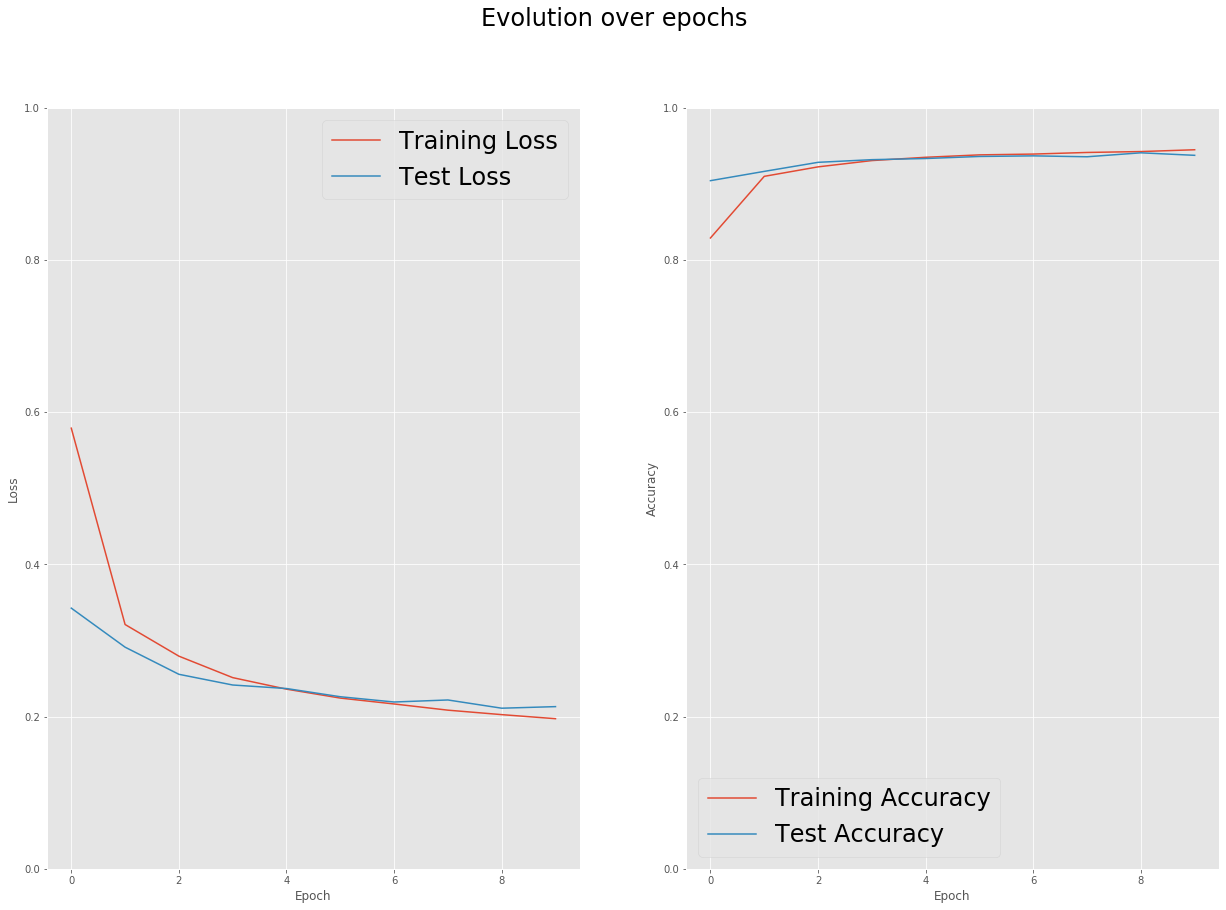

In [23]:
plot_history(history)

## Coding Challenge
Try to make this model better:
- Add more layers
- Add more neurons on layers
- Change activation functions

In [0]:
# Start here

## Can we do better?
Yes we can. In fact, fully-conected neural networks are not appropiate for working with images. There is another type of neural network that is purposely built for this type of data. That is the **Convolutional Neural Network**, or CNN, for short, which we will cover in detail **in the upcoming events**.

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(np.expand_dims(x_train, -1) / 255, y_train, batch_size=32, epochs=3, validation_data=(np.expand_dims(x_test, -1) / 255, y_test))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 171s 3ms/step - loss: 0.1881 - acc: 0.9420 - val_loss: 0.0420 - val_acc: 0.9851
Epoch 2/3
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0793 - acc: 0.9764 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 3/3
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0603 - acc: 0.9819 - val_loss: 0.0343 - val_acc: 0.9886


# Deciding how many neurons/layers a model should have
![](https://)$\begin{equation}
N_h = \dfrac{N_s}{\alpha * (N_i + N_o)}
\end{equation}$

$N_h$ = number of neurons in the hidden layers

$N_i$ = number of input neurons

$N_o$ = number of output neurons

$N_s$ = number of samples

$\alpha$ = arbitrary scaling factor, usually 2-10 

**NOTE**
This only applies to **fully-conected** layers. The **UNIVERSAL APROXIMATION THEOREM** states that a fully-conected neural network with only one hidden layer can learn any function (with arbitrary number of neurons, of course)